# Bias Detection Engine Demo: Recruiting

In [1]:
!pip install -q aif360
!pip install -q seaborn

In [2]:
import sys
sys.path.append('..')

import pandas as pd

from engine import bias_table, bias_grid

Load simulated recruiting data

In [3]:
# df = pd.read_excel('../data/recruiting_simulated_data_2020_8_4_v1(1).xlsx')
df = pd.read_excel('../data/recruiting_simulated_data_2020_8_6_v1.xlsx')
df = df.drop(columns=['black_shortlist_bias', 'black_interview_bias', 'black_offer_bias', 'black_hire_bias', 'date_disposition'])
# df = pd.read_excel('../data/recruiting_simulated_data_funnel_remediation_2020_8_12_v2.xlsx')
# df = df.drop(columns=['black_shortlist_bias', 'black_interview_bias', 'black_offer_bias', 'black_hire_bias', 'date_disposition', 'qtr_application'])
df.loc[:, 'date_application':] = df.loc[:, 'date_application':].notna()
df = df.fillna('Other').set_index(['race', 'gender'])
df = df.rename(columns=lambda x: x.split('date_')[1])
# df

## Bias Tables

In [4]:
bias_table(df, 'race', 'applicants')

Closer to 1 is better. Disparate impact < 0.8 implies bias against group (red), > 1.25 implies bias for group (blue).

We see clear signs of bias against black applicants in the shortlisting stage. We also see black applicants who are given an offer are slightly less likely to accept.
The bias for Pacific Islanders is likely spurious given how few applicants there are from that group in the data (~1%).

In [5]:
bias_table(df, 'gender', 'applicants')

In [6]:
bias_table(df, instance_type='applicants')

Disparate impact is simply the ratio of _selection rates_, or the proportion of applicants who move on to the next stage, between one group and all the others.

Therefore, we can look at selection rates themselves to see which groups are disadvantaged.

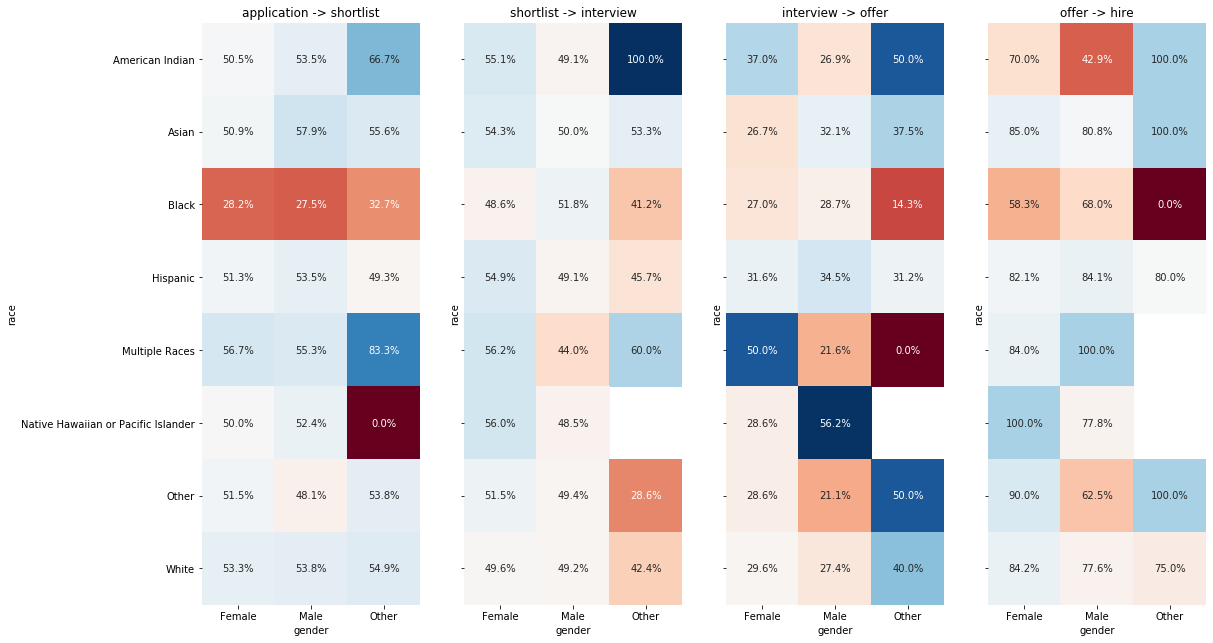

In [7]:
bias_grid(df)

Darker red colored squares are worse than average and darker blue squares are better than average. Blank squares mean there is no data.

Again, we can clearly see bias in the shortlisting stage as all three black intersectional groups are disadvantaged (redder) compared to the others.